In [29]:
import numpy as np
from dataclasses import dataclass, field, replace
import enum
import typing
import re

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import cmasher as cmr

from heapq import heappop,heappush


In [582]:
with open("input17.txt") as f:
    npcitymap = np.array([[int(c) for c in line] for line in f.read().splitlines()])
with open("input17.txt") as f:
    citymap = {(x,y): int(c)  for y,line in enumerate(f) for x,c in enumerate(line.rstrip())}
citysize = npcitymap.shape

In [553]:
ex = """2413432311323
3215453535623
3255245654254
3446585845452
4546657867536
1438598798454
4457876987766
3637877979653
4654967986887
4564679986453
1224686865563
2546548887735
4322674655533
"""

npexcity =  np.array([[int(c) for c in line] for line in ex.splitlines()])
excity = {(x,y): int(c)  for y,line in enumerate(ex.splitlines()) for x,c in enumerate(line)}

excitysize = npexcity.shape

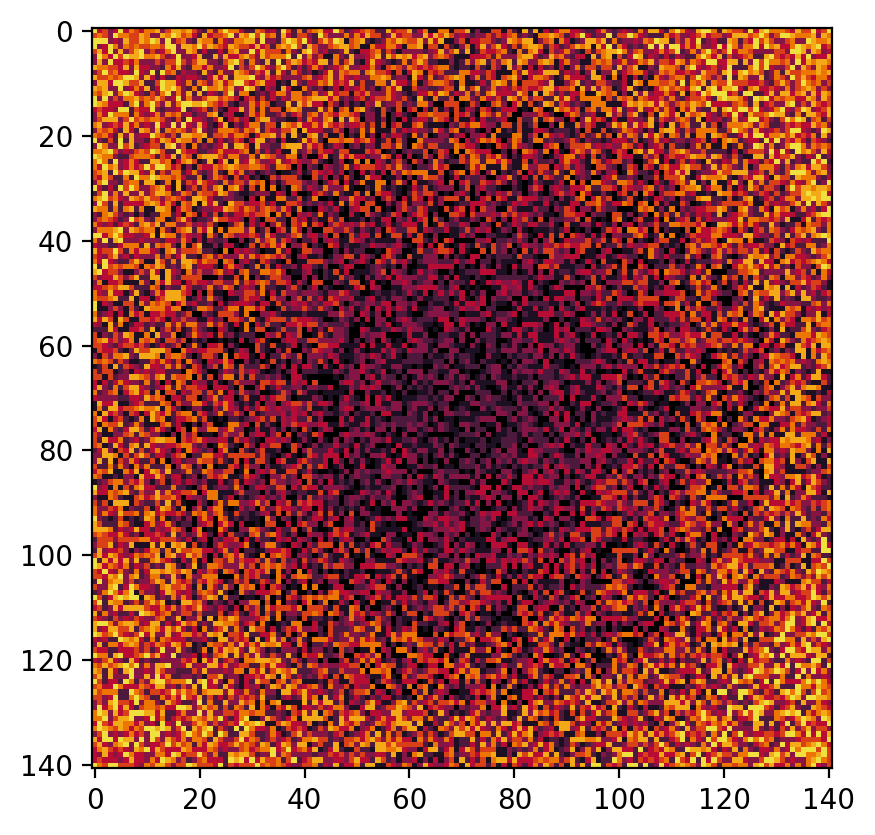

In [529]:
plt.imshow(npcitymap,cmap="cmr.ember_r")

# Part 1

In [554]:
@dataclass(order=True)
class Crucible:
    x: int = 0
    y: int = 0
    lostheat : int = 0
    lastturn :int = 1
    dir : Dir = Dir.E
    previouspoints : typing.List = field(default_factory=lambda: [])

    def copy(self):
        new = replace(self)
        new.previouspoints = self.previouspoints.copy()
        return new

    def isinbounds(self,city):
        N,M = city.shape
        return self.x>=0 and self.x<M and self.y>=0 and self.y<N
    
    def gostraight(self):
        "This doesn't check for inbounds and do not acccount for lost heat"
        new = self.copy()
        new.lastturn+=1
        match self.dir:
            case Dir.N: new.y-=1
            case Dir.S: new.y+=1
            case Dir.E: new.x+=1
            case Dir.W: new.x-=1
        return new
    
    def turnleftandmove(self):
        new = self.copy()
        new.dir = new.dir.turnleft()
        new.lastturn = 0
        return new.gostraight()
    
    def turnrighttandmove(self):
        new = self.copy()
        new.dir = new.dir.turnright()
        new.lastturn = 0
        return new.gostraight()
    
    def loseheat(self,citymap):
        self.previouspoints.append((self.x,self.y))
        self.lostheat += citymap[self.y,self.x]
        return self
    
    def disttogo(self,city):
        N,M = city.shape
        return abs(N-1-self.y)+abs(M-1-self.x)
    
    def nextmoves(self,citymap):
        possible = []
        # print(self)
        if self.lastturn<3:
            crucible = self.gostraight()
            possible.append(crucible)
        possible +=[self.turnleftandmove(),self.turnrighttandmove()]
        possible = [move.loseheat(citymap) for move in possible if move.isinbounds(citymap)]
        # print(self)
        return possible



In [562]:
def navigatecity(citymap):
    N,M = citymap.shape
    start = Crucible()
    queue = [(start.disttogo(citymap),0,start)]
    visited = dict()
    while queue:
        cost,lostheat,crucible = heappop(queue)
        visited[(crucible.x,crucible.y,crucible.dir,crucible.lastturn)] = crucible
        if crucible.disttogo(citymap)==0:
            return lostheat,crucible,queue,visited
        else:
            for neighbour in crucible.nextmoves(citymap):
                newlostheat = lostheat+ citymap[neighbour.y,neighbour.x]
                cost = lostheat + neighbour.disttogo(citymap)
                if ((neighbour.x,neighbour.y,neighbour.dir,neighbour.lastturn) not in visited):# and ((cost, neighbour.lostheat, neighbour) not in queue):
                     heappush(queue,(cost, newlostheat, neighbour))
                

    

In [570]:
#Not all from me after 4 hrs on my buggy Djikstra

def navigatecity2(start, end, least, most,city):
    queue = [(0, *start, 0,0)]
    seen = set()
    while queue:
        
        heat,x,y,px,py = heappop(queue)
        if (x,y) == end: return heat
        if (x,y, px,py) in seen: continue
        seen.add((x,y, px,py))
        #Only turns since all straight moves are done after in the for looop
        for dx,dy in {(1,0),(0,1),(-1,0),(0,-1)}-{(px,py),(-px,-py)}:
            a,b,h = x,y,heat

            for i in range(1,most+1):
                a,b=a+dx,b+dy
                if (a,b) in city:
                    h += city[a,b]
                    if i>=least:
                        heappush(queue, (h, a,b, dx,dy))

In [563]:
lostheat, final,queue,visited = navigatecity(npexcity)
lostheat

102

In [560]:
end = tuple(a-1 for a in excitysize)
navigatecity2((0,0),end,1,3,excity)

102

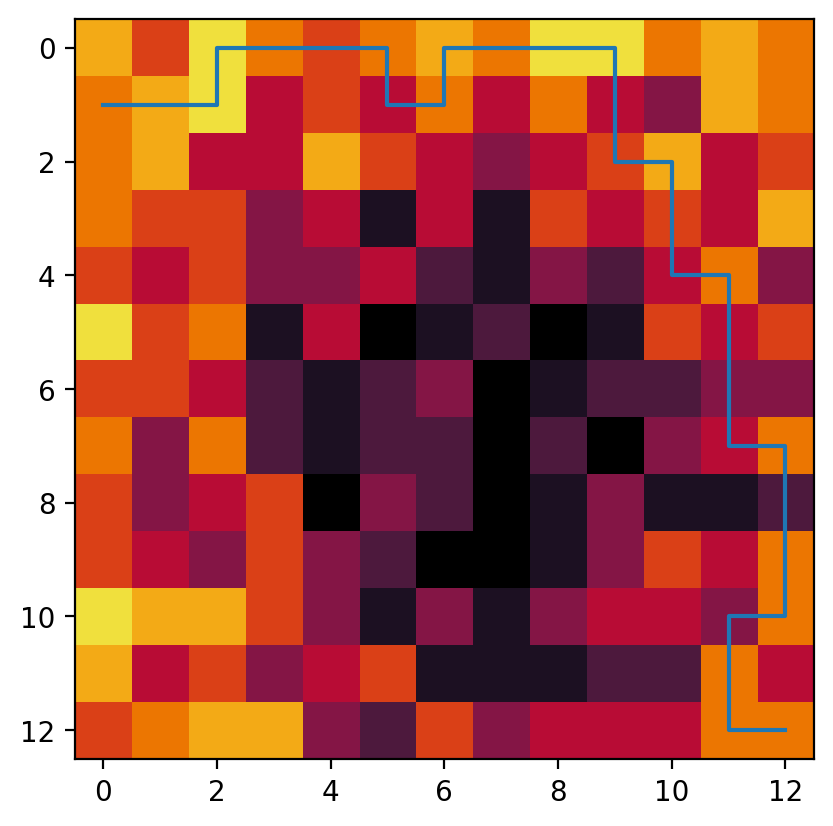

In [590]:
plt.imshow(npexcity,cmap="cmr.ember_r")
plt.plot(*np.array(final.previouspoints).T)



In [585]:
end = tuple(a-1 for a in citysize)
navigatecity2((0,0),end,1,3,citymap)

1110

# Part 2

In [593]:
end = tuple(a-1 for a in citysize)
navigatecity2((0,0),end,4,10,citymap)

1294